In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config import google_api_key
import gmaps

In [3]:
df = pd.read_csv('Final Data.csv')

In [11]:
x_axis = df['Median Home Price']
y_axis = df['Weighted 3 Year Average API']

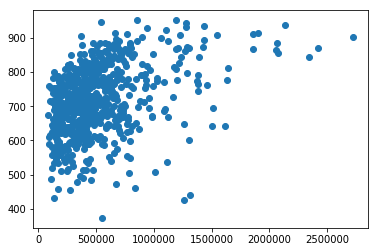

In [12]:
plt.scatter(x_axis, y_axis, marker='o')